In [140]:
import base64
import re
import pandas as pd
import os
from huggingface_hub import InferenceClient
from natsort import natsorted
import numpy as np
import time
folder_path = "archive/images/"
base64_images = [
    base64.b64encode(open(os.path.join(folder_path, f), "rb").read()).decode('utf-8')
    for f in natsorted(os.listdir(folder_path))
    if os.path.isfile(os.path.join(folder_path, f))
]
output_gemma = []
output_qwen = []
print(f"Закодировано изображений: {len(base64_images)}")

Закодировано изображений: 39


### Обращение к модели dima806/facial_emotions_image_detection

In [112]:
client = InferenceClient(
    provider="hf-inference",
    api_key=os.environ["HF_TOKEN"],
)
output = []
for image in os.listdir(folder_path):
    output = output + client.image_classification(folder_path + image, model="dima806/facial_emotions_image_detection")
output

[ImageClassificationOutputElement(label='neutral', score=0.7460079789161682),
 ImageClassificationOutputElement(label='sad', score=0.1032661572098732),
 ImageClassificationOutputElement(label='fear', score=0.058445461094379425),
 ImageClassificationOutputElement(label='happy', score=0.04335441067814827),
 ImageClassificationOutputElement(label='angry', score=0.03251199424266815),
 ImageClassificationOutputElement(label='fear', score=0.6285816431045532),
 ImageClassificationOutputElement(label='surprise', score=0.2845604121685028),
 ImageClassificationOutputElement(label='angry', score=0.03126480057835579),
 ImageClassificationOutputElement(label='happy', score=0.0232162494212389),
 ImageClassificationOutputElement(label='sad', score=0.019774287939071655),
 ImageClassificationOutputElement(label='neutral', score=0.7392191290855408),
 ImageClassificationOutputElement(label='angry', score=0.09016966074705124),
 ImageClassificationOutputElement(label='sad', score=0.06350474059581757),
 Ima

### Обращение к модели google/gemma-3-27b-it

In [141]:
client = InferenceClient(
    api_key=os.environ["HF_TOKEN"],
)
for i in range (0,39):
    completion = client.chat.completions.create(
        model="google/gemma-3-27b-it:scaleway",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "есть список эмоций: Angry Disgust Fear Happy Sad Surprise Neutral. Проанализируй фотографию и выведи вероятность принадлежности фото определенной эмоции. Ответ выведи в таком формате: 'Название эмоции': 'Вероятность дробным числом (например, 0.22, не 22%)'. Напиши только 5 самых возможных эмоций. Больше ничего не добавляй"
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_images[i]}"
                        }
                    }
                ]
            }
        ],
    )
    output_gemma.append(completion.choices[0].message.content)
    time.sleep(10)
output_gemma

["'Neutral': '0.65'\n'Sad': '0.15'\n'Fear': '0.10'\n'Surprise': '0.05'\n'Disgust': '0.05'",
 "'Surprise': '0.85'\n'Fear': '0.10'\n'Neutral': '0.03'\n'Disgust': '0.01'\n'Sad': '0.01'",
 "'Fear': '0.78'\n'Surprise': '0.15'\n'Sad': '0.03'\n'Neutral': '0.02'\n'Disgust': '0.01'",
 "'Neutral': '0.75'\n'Sad': '0.12'\n'Fear': '0.05'\n'Disgust': '0.04'\n'Angry': '0.04'",
 "'Surprise': 0.65\n'Fear': 0.20\n'Neutral': 0.10\n'Sad': 0.03\n'Disgust': 0.02",
 "'Happy': '0.95'\n'Neutral': '0.03'\n'Surprise': '0.01'\n'Sad': '0.005'\n'Angry': '0.005'",
 "'Neutral': '0.78'\n'Sad': '0.11'\n'Fear': '0.05'\n'Disgust': '0.03'\n'Surprise': '0.03'",
 "'Neutral': '0.85'\n'Sad': '0.08'\n'Fear': '0.03'\n'Disgust': '0.02'\n'Surprise': '0.01'",
 "'Sad': '0.65'\n'Neutral': '0.20'\n'Angry': '0.07'\n'Disgust': '0.05'\n'Fear': '0.03'",
 "'Neutral': 0.75\n'Sad': 0.10\n'Fear': 0.05\n'Disgust': 0.04\n'Angry': 0.03",
 "'Neutral': 0.75\n'Sad': 0.12\n'Disgust': 0.05\n'Fear': 0.04\n'Surprise': 0.04",
 "'Neutral': '0.85'\n'Sad'

### Обращение к модели Qwen/Qwen2.5-VL-7B-Instruct

In [142]:
client = InferenceClient(
    api_key=os.environ["HF_TOKEN"],
)
for i in range(0,39):
    completion = client.chat.completions.create(
        model="Qwen/Qwen2.5-VL-7B-Instruct:hyperbolic",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "есть список эмоций: Angry Disgust Fear Happy Sad Surprise Neutral. Проанализируй фотографию и выведи вероятность принадлежности фото определенной эмоции. Ответ выведи в таком формате: 'Название эмоции': 'Вероятность дробным числом (например, 0.22, не 22%)'. Напиши только 5 самых возможных эмоций. Больше ничего не добавляй"
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_images[i]}"
                        }
                    }
                ]
            }
        ],
    )
    output_qwen.append(completion.choices[0].message.content)
    time.sleep(10)
output_qwen

["'Angry': '0.45'\n'Neutral': '0.32'\n'Sad': '0.18'\n'Happy': '0.05'\n'Neutral': '0.05'",
 'Surprise: 0.85\nFear: 0.12\nAngry: 0.05\nDisgust: 0.02\nHappy: 0.01',
 'Neutral: 0.65\nHappy: 0.15\nSad: 0.10\nSurprise: 0.05\nFear: 0.05',
 'Neutral: 0.85\nHappy: 0.08\nSad: 0.06\nAngry: 0.03\nDisgust: 0.02',
 'Surprise: 0.65\nHappy: 0.20\nSad: 0.10\nNeutral: 0.05\nFear: 0.05',
 'Happy: 0.85\nNeutral: 0.10\nSad: 0.05\nSurprise: 0.03\nFear: 0.02',
 'Neutral: 0.95\nSad: 0.03\nDisgust: 0.02\nHappy: 0.01\nAngry: 0.01',
 'Angry: 0.95\nDisgust: 0.78\nNeutral: 0.15\nFear: 0.05\nSad: 0.02',
 "'Angry': '0.85'\n'Disgust': '0.15'\n'Fear': '0.05'\n'Happy': '0.02'\n'Sad': '0.03'",
 "'Neutral': '0.75'",
 "'Neutral': '0.30'  \n'Happy': '0.25'  \n'Sad': '0.20'  \n'Angry': '0.15'  \n'Neutral': '0.10'",
 'Neutral: 0.85\nAngry: 0.08\nDisgust: 0.05\nSad: 0.02\nHappy: 0.01',
 "'Fear': '0.45'\n'Angry': '0.30'\n'Neutral': '0.20'\n'Sad': '0.05'\n'Happy': '0.05'",
 "'Neutral': '0.15'\n'Happy': '0.20'\n'Surprise': '0.25

In [123]:
data = []
for i, result in enumerate(output):
    data.append({
        'labelF': result['label'],
        'scoreF': result['score']
    })
df = pd.DataFrame(data)
df

,labelF,scoreF
0,neutral,0.746008
1,sad,0.103266
2,fear,0.058445
3,happy,0.043354
4,angry,0.032512
...,...,...
190,surprise,0.699558
191,fear,0.167385
192,happy,0.060133
193,angry,0.034304


In [143]:
filtered_gemma = []
allowed_words = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
pattern = r'\d+[,.]?\d*|%|' + '|'.join(re.escape(word) for word in allowed_words)
for string in output_gemma:
    matches = re.findall(pattern, string)
    filtered_string = ' '.join(matches)
    if filtered_string.startswith('5 '):
        filtered_string = filtered_string[2:]
    filtered_gemma.append(filtered_string)
filtered_gemma

['Neutral 0.65 Sad 0.15 Fear 0.10 Surprise 0.05 Disgust 0.05',
 'Surprise 0.85 Fear 0.10 Neutral 0.03 Disgust 0.01 Sad 0.01',
 'Fear 0.78 Surprise 0.15 Sad 0.03 Neutral 0.02 Disgust 0.01',
 'Neutral 0.75 Sad 0.12 Fear 0.05 Disgust 0.04 Angry 0.04',
 'Surprise 0.65 Fear 0.20 Neutral 0.10 Sad 0.03 Disgust 0.02',
 'Happy 0.95 Neutral 0.03 Surprise 0.01 Sad 0.005 Angry 0.005',
 'Neutral 0.78 Sad 0.11 Fear 0.05 Disgust 0.03 Surprise 0.03',
 'Neutral 0.85 Sad 0.08 Fear 0.03 Disgust 0.02 Surprise 0.01',
 'Sad 0.65 Neutral 0.20 Angry 0.07 Disgust 0.05 Fear 0.03',
 'Neutral 0.75 Sad 0.10 Fear 0.05 Disgust 0.04 Angry 0.03',
 'Neutral 0.75 Sad 0.12 Disgust 0.05 Fear 0.04 Surprise 0.04',
 'Neutral 0.85 Sad 0.10 Fear 0.03 Disgust 0.01 Surprise 0.01',
 'Neutral 0.65 Sad 0.15 Surprise 0.10 Disgust 0.05 Fear 0.05',
 'Surprise 0.75 Fear 0.15 Neutral 0.04 Disgust 0.03 Sad 0.03',
 'Angry 0.65 Sad 0.15 Disgust 0.10 Neutral 0.07 Fear 0.03',
 'Neutral 0.65 Sad 0.15 Disgust 0.10 Fear 0.05 Surprise 0.05',
 'S

In [144]:
filtered_qwen = []
for string in output_qwen:
    text = re.sub(r'\b\d+\.\s+', '', string)
    matches = re.findall(pattern, text)
    filtered_string_qwen = ' '.join(matches)
    filtered_string_qwen = ' '.join(dict.fromkeys(filtered_string_qwen.split()))
    filtered_qwen.append(filtered_string_qwen)
filtered_qwen

['Angry 0.45 Neutral 0.32 Sad 0.18 Happy 0.05',
 'Surprise 0.85 Fear 0.12 Angry 0.05 Disgust 0.02 Happy 0.01',
 'Neutral 0.65 Happy 0.15 Sad 0.10 Surprise 0.05 Fear',
 'Neutral 0.85 Happy 0.08 Sad 0.06 Angry 0.03 Disgust 0.02',
 'Surprise 0.65 Happy 0.20 Sad 0.10 Neutral 0.05 Fear',
 'Happy 0.85 Neutral 0.10 Sad 0.05 Surprise 0.03 Fear 0.02',
 'Neutral 0.95 Sad 0.03 Disgust 0.02 Happy 0.01 Angry',
 'Angry 0.95 Disgust 0.78 Neutral 0.15 Fear 0.05 Sad 0.02',
 'Angry 0.85 Disgust 0.15 Fear 0.05 Happy 0.02 Sad 0.03',
 'Neutral 0.75',
 'Neutral 0.30 Happy 0.25 Sad 0.20 Angry 0.15 0.10',
 'Neutral 0.85 Angry 0.08 Disgust 0.05 Sad 0.02 Happy 0.01',
 'Fear 0.45 Angry 0.30 Neutral 0.20 Sad 0.05 Happy',
 'Neutral 0.15 Happy 0.20 Surprise 0.25 Angry Fear',
 'Angry 0.72 Disgust 0.20 Fear 0.05 Neutral 0.03 Happy 0.02',
 'Neutral 0.40 Angry 0.30 Sad 0.15 Happy 0.10 Disgust 0.05',
 'Happy 0.15 Sad 0.20 Neutral 0.30 Angry Fear',
 'Neutral 0.95 Happy 0.03 Sad 0.02 Disgust 0.01 Angry',
 'Angry 0.85 Neut

In [145]:
pattern = r'([A-Za-z]+)\s+(\d+\.\d+)'
all_data = []
for string in filtered_gemma:
    matches = re.findall(pattern, string)
    for label, score in matches:
        all_data.append({
            'labelG': label,
            'scoreG': float(score)
        })
df_gemma = pd.DataFrame(all_data)
df_gemma

,labelG,scoreG
0,Neutral,0.65
1,Sad,0.15
2,Fear,0.10
3,Surprise,0.05
4,Disgust,0.05
...,...,...
190,Angry,0.75
191,Sad,0.15
192,Disgust,0.05
193,Neutral,0.03


In [155]:
all_data = []
for i, string in enumerate(filtered_qwen):
    matches = re.findall(pattern, string)
    for label, score in matches:
        all_data.append({
            'row_index': i,
            'labelQ': label,
            'scoreQ': float(score)
        })
df_qwen = pd.DataFrame(all_data)
df_qwen

,row_index,labelQ,scoreQ
0,0,Angry,0.45
1,0,Neutral,0.32
2,0,Sad,0.18
3,0,Happy,0.05
4,1,Surprise,0.85
...,...,...,...
157,37,Neutral,0.25
158,37,Sad,0.10
159,38,Angry,0.95
160,38,Disgust,0.05


In [185]:
all_files = os.listdir(folder_path)
photo_names = [f for f in all_files]
photo_names = natsorted(photo_names)
repeated_names = np.repeat(photo_names, 5)
df['photo_name'] = repeated_names
df['labelF'] = df['labelF'].str.capitalize()
df

,labelF,scoreF,photo_name,emotion
0,Neutral,0.746008,0Angry.jpg,Angry
1,Sad,0.103266,0Angry.jpg,Angry
2,Fear,0.058445,0Angry.jpg,Angry
3,Happy,0.043354,0Angry.jpg,Angry
4,Angry,0.032512,0Angry.jpg,Angry
...,...,...,...,...
190,Surprise,0.699558,18Angry.jpg,Angry
191,Fear,0.167385,18Angry.jpg,Angry
192,Happy,0.060133,18Angry.jpg,Angry
193,Angry,0.034304,18Angry.jpg,Angry


In [160]:
df_gemma['photo_name'] = repeated_names
df_gemma

,labelG,scoreG,photo_name
0,Neutral,0.65,0Angry.jpg
1,Sad,0.15,0Angry.jpg
2,Fear,0.10,0Angry.jpg
3,Surprise,0.05,0Angry.jpg
4,Disgust,0.05,0Angry.jpg
...,...,...,...
190,Angry,0.75,18Angry.jpg
191,Sad,0.15,18Angry.jpg
192,Disgust,0.05,18Angry.jpg
193,Neutral,0.03,18Angry.jpg


In [161]:
df_qwen['photo_name'] = df_qwen['row_index'].apply(lambda x: photo_names[x])
df_qwen_f = df_qwen.drop('row_index',axis=1)
df_qwen_f

,labelQ,scoreQ,photo_name
0,Angry,0.45,0Angry.jpg
1,Neutral,0.32,0Angry.jpg
2,Sad,0.18,0Angry.jpg
3,Happy,0.05,0Angry.jpg
4,Surprise,0.85,0Fear.jpg
...,...,...,...
157,Neutral,0.25,17Happy.jpg
158,Sad,0.10,17Happy.jpg
159,Angry,0.95,18Angry.jpg
160,Disgust,0.05,18Angry.jpg


In [162]:
df.to_csv('facial_data.csv')
df_gemma.to_csv('gemma_data.csv')
df_qwen_f.to_csv('qwen_data.csv')

In [168]:
df['emotion'] = df['photo_name'].str.extract(r'(\D+)\.')[0]
df_gemma['emotion'] = df_gemma['photo_name'].str.extract(r'(\D+)\.')[0]
df_qwen_f['emotion'] = df_qwen_f['photo_name'].str.extract(r'(\D+)\.')[0]

<Axes: >

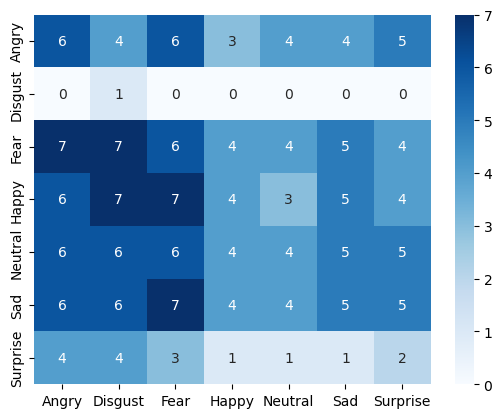

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['labelF'],df['emotion'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = sorted(list(df['emotion'].unique())), yticklabels = sorted(list(df['emotion'].unique())))

<Axes: >

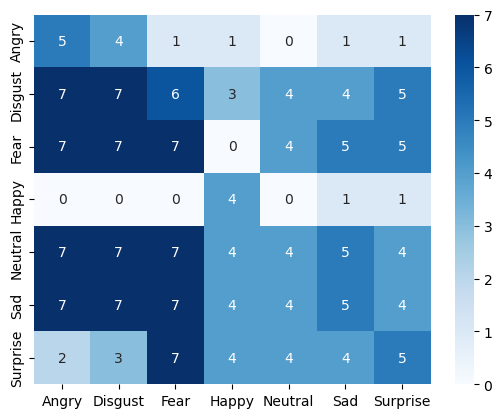

In [210]:
cm_gem = confusion_matrix(df_gemma['labelG'],df_gemma['emotion'])
sns.heatmap(cm_gem, annot=True, fmt='d', cmap='Blues', xticklabels = sorted(list(df_gemma['emotion'].unique())), yticklabels = sorted(list(df_gemma['emotion'].unique())))

<Axes: >

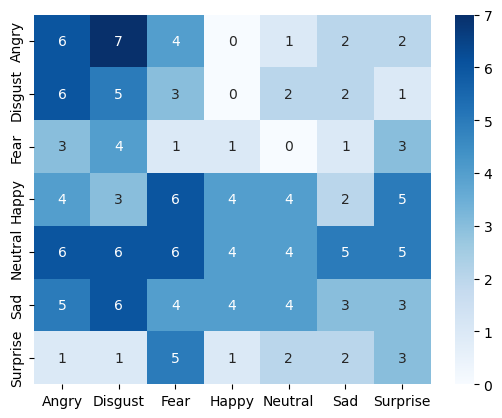

In [211]:
cm_qwen = confusion_matrix(df_qwen_f['labelQ'],df_qwen_f['emotion'])
sns.heatmap(cm_qwen, annot=True, fmt='d', cmap='Blues', xticklabels = sorted(list(df_qwen_f['emotion'].unique())), yticklabels = sorted(list(df_qwen_f['emotion'].unique())))